# Face Authentication using Siamese Networks

Submitted By:- Sonu Dileep and Saptarshi Chatterjee, December 17, 2019

# Motivation

We started with the motivation that we could make something that is close to FaceID. We figured we’ll never be able to make it as efficient but it was interesting to find out that the tools for it are out there and waiting to be used.
And of course, grades were a big motivator as well.

# Introduction

Facial recognition is one of the most actively researched and implemented topics in the field of computer vision and machine learning. The evolution of convolutional neural networks (CNNs) has shown a significant improvement in this field and showed how efficiently we can recognize faces. But the problem with most CNN architectures is that it requires a large amount of data for training as evidenced by all the technology that Google has to offer, for instance recognizing all the people from Google Photos. Facebook is not far behind in this respect either. But this is practically impossible in most of the cases. For example if we want to implement a face verification system in an office/company, it is impossible to collect large amounts of data (especially images of their faces) from each employee. Also CNN's require the entire network to be retrained in case we want to add a new class to our network. This requires a lot of computation time and power and is not feasible for any company having more than a few employees or any group in general consisting of more than a few people. Thus computer scientists had to come up with an idea to circumvent this tedious process. They then came up with the idea of one-shot learning. One shot learning methods learn classifying information using one or very few examples. One shot learning methods use a siamese architecture to identify/classify the image. Siamese networks are architectures containing two or more identical (twin) neural networks. All these networks share the same weights. This technique ensures that the two networks do not map similar images into completely different areas of the feature space. The use of siamese network in our project is to determine the similarity between the 2 images. The main components in the neural networks are convolutional layers, pooling layers to prevent an explosion of the feature space (and this is also useful to get rid of features that do not contribute anything valuable to the final result), fully-connected layers and the output is a feature vector having 4096 dimensions. These output vectors are the encoding of each image. Siamese networks use these encodings to compare similarity between 2 or more images. A distance function does this job in a siamese network to find the similarity score. The similarity score is computed in the final layer where the distances are fed into this layer and using a sigmoidal activation function, the final scalar output is a probability (or simply a number) signifying the degree of similarity based on a certain pre-determined threshold.<br> 

Siamese neural network is an artificial neural network that use the same weights while working in tandem on two different input vectors to compute comparable output vectors. It consists of twin networks which accept distinct inputs but are joined by an energy function at the end. One-Shot Learning uses one training sample for a class and outputs a similarity score between the training sample and all subsequent samples that are presented alongside it
A good analogy here is that of a human infant. We show the picture of a tiger once to a child and they understand what a tiger looks like and will be able to say that a pigeon is not a tiger, even though they may have no idea about what a pigeon is.<br>
                                                                                                                       For the purposes of this project we decided to explore 2 siamese architecture for facial authentication. In the first phase we followed the paper "Siamese Neural Networks for One-shot Image Recognition" by Gregory Koch, Richard Zemel, Ruslan Salakhutdinov. The model in this paper consists of a sequence of convolutional layers with different filter sizes with stride 1. Each of the output feature maps is passed through a "ReLU" activation function and is then followed by a max pooling layer to prevent an explosion of features and also to prevent overfitting. The output from the final convolutional layer is flattened to a single vector.

The architecture of one of the twins of the Siamese Convolutional Neural Network is shown in the image below.[ Image_Source:-Gregory Koch, Richard Zemel,Ruslan Salakhutdinov - "Siamese Neural Networks for One-shot Image Recognition"]
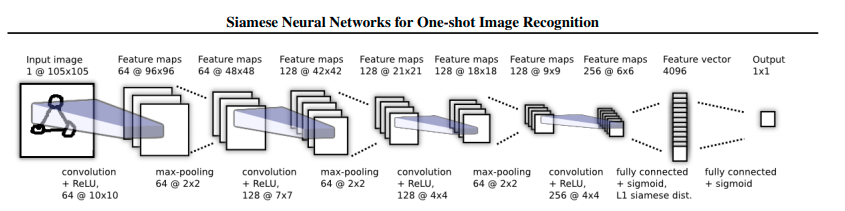

We followed the architecture laid out in this paper exactly as it is. 
In this paper the authors aim to first learn a neural network that can discriminate between the class-identity of image pairs, which is the standard verification task for image recognition, i.e., given any two images from the same alphabet or different alphabets, this network will predict whether those images depict the same character. This architecture ensures the consistency of its predictions. Weight tying guarantees that two extremely similar images could not possibly be mapped by their respective networks to very different locations in the feature space.
The network is symmetric. The authors have used the MNIST Omniglot dataset containing over 50 different alphabets and worked on recognizing similarity between the alphabets.Their model recognizes whether or not a pair of letters/symbols are derived from the same alphabet set.<br>


The siamese network for our implementation uses 2 such identical networks and each network takes one input image. This image is passed through a series of convolutional and max pooling layers to map their features while preventing an explosion in the number of computed features. The convolutional layers are followed by a fully connected layer. The output from both fully-connected layer is a 4096-D vector which is passed to a distance function. As suggested by the paper cited above, we use the Euclidean distance between the images as the distance metric. This distance function calculates a distance score which determines the similarity between the images. The distance function is then given as the input to a single sigmoidal output unit. It outputs the final similarity score, a value between '0' and '1'. A value of '0' means the images are similar and value of '1' implies complete dissimilarity. Experimentally we set a threshold value of 0.6 so that any score below this value is considered to be similar and above it to be dissimilar. The loss function described in the paper is "cross-entropy", which is essentially the difference between the desired and predicted probabilities. Also the paper describes a weight initialization method to improve the efficiency of model. All weights in the convolutional layers are initialized from a normal distribution with zero mean and 10^−2 standard deviation. The bias weights are also initialized similarly with 0.5 mean and 10^-2 standard deviation. Also the model used Stochastic Gradient Descent algorithm for optimization. However, for our experimentation purposes, we tried Adam and RMSprop as well. RMSprop gave us the best results out of the three optimization methods that we experimented with. We used "faces95" dataset provided by "University of Essex" to train our model.The inputs to the siamese network goes as pairs. If the pairs are similar images then we set a label of '1' to that pair and '0' if they are  dissimilar. So we wrote a function to create a database containing image pairs. We chose 3000 combination of image pairs to train the network and 500 images to validate the model and another 200 to test the model. We performed image standardization on all the images before training, wherein we made our image data centered at 0, i.e., mean is 0. Also we normalized all images i.e., pixel values of the image after normalization are in a range between 0 to 1 instead of 0 to 255. First we trained the model using our defined training set. But this model was not very efficient on the validation set. So we decided to make some changes in the convolutional layers, hyperparameter values such as momentum and learning rate, optimization algorithms and loss functions to improve the accuracy. Different loss functions had a significant impact on the accuracy of the network. Changing the loss function from cross-entropy to contrastive loss showed a significant change in accuracy on validation set. Contrastive loss is used for image retrieval tasks. It helps the model to learn many useful features for image comparisons. Shown below is the equation of contrastive loss function.
 [Image_source:-https://jdhao.github.io/2017/03/13/some_loss_and_explanations/]
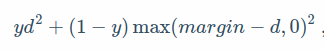

In the image shown above, <b>d</b> is the output from the siamese network i.e., the similarity score or distance. The term margin is used as a constraint such that if 2 images are dissimilar then the distance between them should be equal to the defined margin. In our model the margin is set to 1 so that the distance between a pair of dissimilar images will be 1. Using contrastive loss improved the accuracy of our model predictions by 15-20%. Then we modified the network architecture by varying the number of convolutional units and changing the filter size and also experimenting in a trial and error fashion with the hyperparameters such as momentum and learning rate. This improved the accuracy by 3-5%. The basic architecture of our first model is shown below.

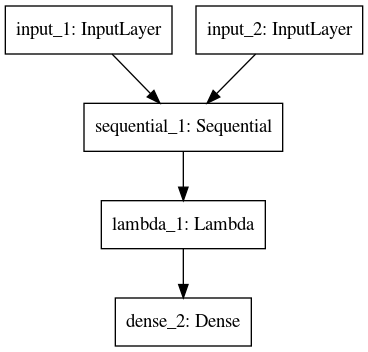

Then we chose a dataset which is completely different from both training and vaidation set. We used the Faces 1999 dataset from Caltech University to test the model. This dataset contains images of people with different expressions, lighting conditions and background. Our model did not perform well on this dataset.
It was then we decided to experiment with a larger, deeper and massively trained network to check how it works, given a baseline of how we want to implement our authentication scheme. Therefore, in the second phase of our project we decided to work based on the paper "FaceNet: A Unified Embedding for Face Recognition and Clustering by Florian Schroff, Dmitry Kalenichenko, James Philbin", all from Google.
            
FaceNet is a really deep network which was trained on millions of images for several days. Training it from scratch is a tedious process and actually it is not necessary because of the availability of pretrained networks and therefore due to lack of resources and time, we just downloaded the model from the source website and worked on that. Facenet can be used for tasks such as face clustering, verification, recognition etc. The basic architecture of FaceNet is shown below.
                                                            
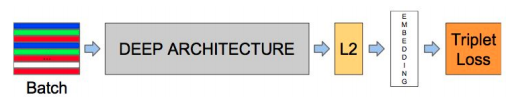


The FaceNet architecture is based on GoogleNet style Inception model. During the development stage the authors of facenet also tried a few other different architectures. But the inception model has 20x fewer parameters when compared to other architectures which perform well. FaceNet uses a triplet loss function for training the image. Triplets are a set of 3 images.These three images are named as anchor, positive and negative image. An anchor and positive are similar images of a same person. While negative is image of a different person. Triplet loss function is used to minimize the squared L2 distance between anchor and positive while increasing the squared L2 distance between anchor and negative. The figure below shows what triplet function does during training/learning.

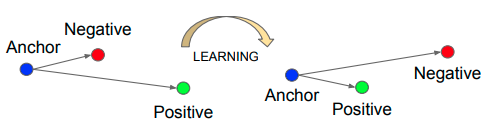                          
Facenet maps the face images to a euclidean space where the distance between images correspond to face similarity. Each mapping is into a 128-D vector. So this 128-D vector contains complete information about each face. The squared L2 distance between each of these 128-D vectors gives us the similarity score between each image.
We then implemented the FaceNet model in a siamese network which takes in 2 images and outputs the similarity score. We did not have to work with the convolutional layers at all as that was available online to download. The only additions we had to make were the distance computation layer and the final output layer. In essence we could get rid of our poorly, rather insufficiently trained convolutional layers in our custom model with Google's deeply trained model and that made all the differences we were hoping it would. Shown below is the architecture of our network based on FaceNet.
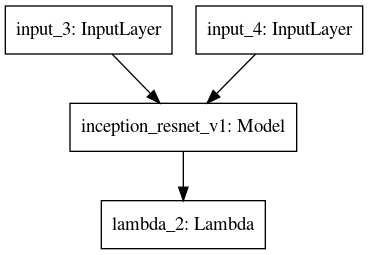   

We set a threshold of <b>1.0</b> to separate the similar and dissimilar images.If the similarity measure goes below 1.0 then the pair is classified as similar and if it goes above the threshold, then they are dissimilar images. We tested the network with few examples and tested the network on test dataset that we defined before. We were getting a really high accuracy (about 95.4%) when compared to the previous network that we trained ourselves.<br> 
In the end, we implemented a function which detects faces from the frame of a camera and compares the face with images in our database. For this purpose and in general, detection of facial features from an image is a Herculean task in itself. To expedite our implementation process, we took help from OpenCV's Haar cascade classifier.<br>

# Methods and Tools 

#### The Cascade Classifier

For almost all testing purposes and especially for the camera implementation, the tool that we found really useful is the  Cascade Classifier provided by OpenCV. 

Object Detection using Haar feature-based cascade classifiers is an effective object detection method proposed by Paul Viola and Michael Jones in their paper, "Rapid Object Detection using a Boosted Cascade of Simple Features" in 2001. It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images. For face detection the algorithm needs a lot of positive images (images of faces) and negative images (images without faces) to train the classifier. Then the features are extracted from it. Once that done, there are lot of optimizations left to be performed so that the less useful features are discarded for the more useful ones.

Using the haarcascade_frontalface_default.xml file to extract the facial features from the images really helped the working of our program, especially when the images are taken from a camera and are not standardized in any way. This file simply contains a set of rules that are used by openCV library functions in order to read in and understanding what it is that we want to process and extract from a given image. Once the correct cascade classifier is chosen, we just detect the multi scale deatures from the images and work with those features in order to train our model.

##### Transfer Learning

An important concept comes to mind when doing projects like this. That concept is called transfer learning. Can we make sure that our network has seen enough variance within a particular set of images so that it can extrapolate a knowledge of cars and apply it such that it can detect trucks when an example of a truck is shown to it? 

In our implementation, since FaceNet is Google’s child, we assume that their pre-trained model has seen enough variances in human faces such that it can  be deployed for any implementation where facial authentication is a requirement. How strictly we enforce the accuracy of this pre-trained model, is something we have to work out.

#### Datasets

##### Faces 1999
The Faces 1999 dataset was collected and archived by Markus Weber at California Institute of Technology. This is a frontal face dataset in Jpeg format containing 450 facial images, each having dimensions 896 x 592 pixels. It comprises of images of 27 unique people under different lighting conditions, with different expressions and having different backgrounds.
 
##### Faces95 
For the Faces95 dataset, the archivers used a fixed camera to capture a sequence of 20 images per individual. During the sequence the subject took one step forward towards the camera. This movement was used to introduce significant head (scale) variations between images of same individual. There is a gap of about 0.5 seconds between successive frames in the sequence.<br>
The dataset contains images of 72 unique individuals with each image in portrait format having a resolution of 180 x 200 pixels. There are images of both male and female subjects.<br>

There is a degree of variation between the images of every individual in this dataset. The variations are:-<br>
<b>Backgrounds:</b> the background consists of a red curtain. Background variation is majorly caused by shadows as the subject moves forward.<br>
<b>Head Scale:</b> There is a large head scale variation that we described above where the subject took ine step closer to the camera at some intervals when the sequence of images was being shot.<br>
<b>Head turn, tilt and slant:</b> there is a minor variation in these attributes.<br>
<b>Position of face in image:</b> with stepping forward there is some translational motion involved.<br>
<b>Image lighting variation:</b> as the subject moves forward, significant lighting changes occur on the faces of the subjects due to the artificial lighting arrangement that they employed.<br>
<b>Expression Variation:</b>  there is some variation in expression wherein the person looks happy, i.e smiles, or grimaces to add some variance.<br>
The archivers made an additional comment where they said that since all images were shot in a single session, there is no variation in hairstyle because that could not be captured.

We started our project by writing a function to create an image database, which for all intents and purposes, is currently just a directory. For the purposes of training and validating our model we used the "faces95" dataset provided by "University of Essex". So functions output pairs of images and the label corresponding to the similarity between those pair of images. That is, if the label is '1' then the images are similar and '0' if they are not similar. Also we standardized all the images inside the function. Started with few training samples of 500 and increased it to 3000-5000.

The medium article titled "Siamese Network - Keras for Image and Text similarity" was really helpful in starting the project.Also we used the pretrained facenet model which we downloaded from kaggle. https://www.kaggle.com/suicaokhoailang/facenet-keras/version/1


##### The Different Methods

The one-liner functions are pretty self-explanatory. For example <b>init_weights</b> is a function that initialises the weights based on the suggestion given by the authors of the Siamese Networks paper. It is the same with <b>init_bias</b> as well as functions like calculation of accuracy and functions that calculate the Euclidean Distance between 2 images.The differences calculated are in turn fed into the last output layer with sigmoidal activation such that it provides us with a final output of the similarity score of the two images fed into the twin networks. 


The <b>read_image</b> function reads the images from our database(the directory) and preprocesses the images and attaches labels to the image pairs. The inputs to this function is the number of samples, number of unique faces available and of course, the path to the images.
We begin by looping through the number of samples, each time choosing randomly if we are going to process two similar images or dissimilar images. Going by this label, we process the images and form our dataset by storing these images in a 2 Dimensional array.


The <b>standardize_image</b> function standardizes the images such that its mean is now centered at 0 and standard deviation is not more than 1. Doing this has proven to be invaluable because we did see some noticeable rise in accuracy after we did this for all images.


The functions for creating the model are pretty straightforward considering how easy Keras makes it. We add the convolution layers and then we add the difference layer and the output layer.The difference layer is where the twin networks output image data and we have to calculate the Euclidean Distance between the image data from both these networks and then send the difference to a sigmoidal activation layer, which will give us our final output. For the facenet model we just set the path to the model and then we added the difference layer and the output layer.


OpenCv's image capturing function was used to capture images using the laptop camera. We extract the image from the captured frames and then we move on to detect the facial features using the Cascade Classifier described above. Once this is done we use our model to predict the similarity between an image in our database (which is just a picture of one of us captured before) vs the image we just captured and processed. 


##### Division of Work
Sonu Dileep :- Worked on implementing the siamese model that is described in the paper "Siamese Neural Networks for One-shot Image Recognition" and also wrote the support functions necessary for implementation. This includes writing functions to read from the image database as pairs and also functions to detect face and standardize image. Found the dataset for training and validating. Tried different convolutional layers to improve the accuracy of the model. 


Saptarshi Chatterjee :- Worked on improving the accuracy of the first model. Implemented the contrastive loss function and also worked on accuracy function. Tried different optimization techniques and different hyperparamter values to find the best network. Worked on implementing siamese network using the FaceNet model and also wrote support functions for the facenet model. Implemented camera function to test the realtime working of model. Found the dataset for testing both models.

# Results

We got an accuracy of 98.27% on the training set after 16 epochs and 86.38% accuracy on validation set.The validation accuracy did not increase after 16 epochs and this is the highest validation accuracy we got.

Shown below is the plot of accuracy and loss function of our custom model.From the graph we can see that accuracy did not get better after 16 epochs.

<table><tr>
<td> 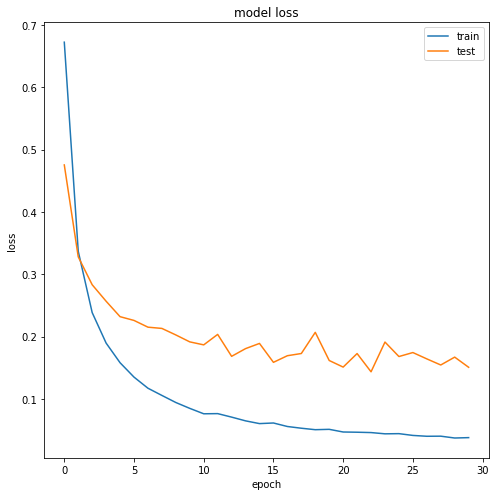 </td>
<td> 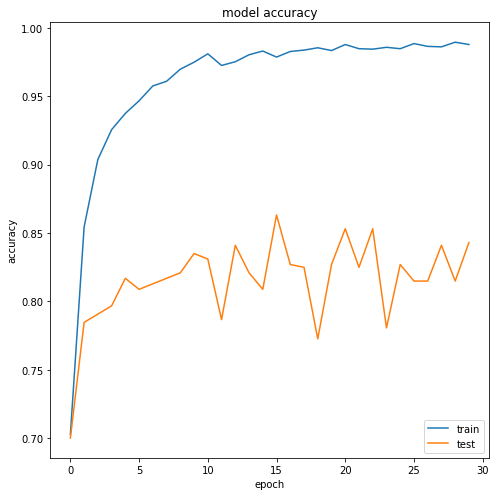 </td>
</tr></table>




We then tested our model on Faces 1999 dataset by CalTech.We achieved only an accuracy of 63.7% using our custom model.This dataset contains images with different background, intensity and facial expressions.So we were not expecting a higher accuracy from the shallow network that we implemented.We then tested our model on few images we downloaded from google images.


Some results with model-1 <br>
<b>Note</b> :- Thresholds are <b>0.6</b> for model-1.So dissimilarity score between 0 and 0.6 will be considered similar images and above 0.6 will be considered dissimilar.

<table><tr>
<td> 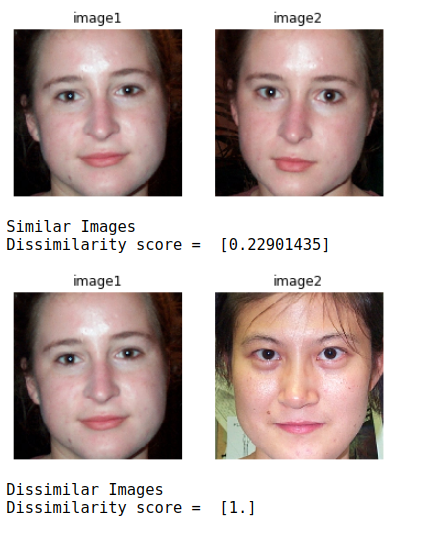 </td>
<td> 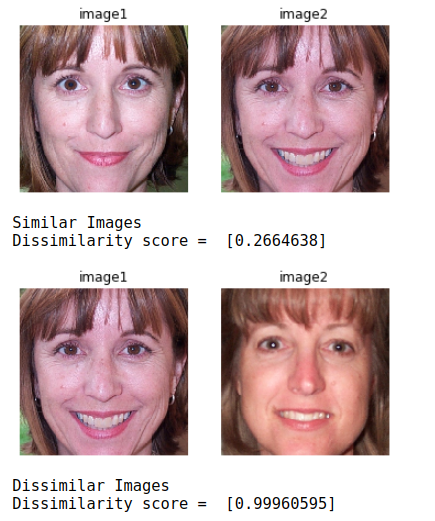 </td>
</tr></table>


Failure cases of model-1


<table><tr>
<td> 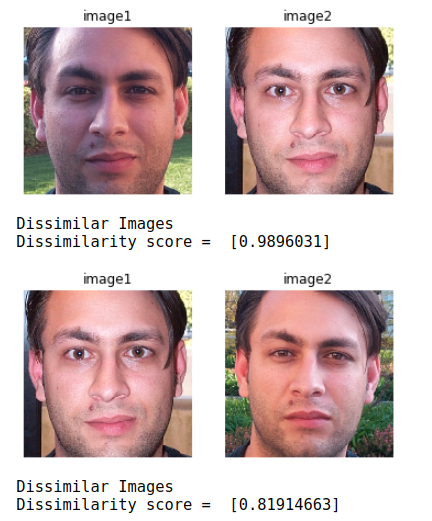 </td>
<td> 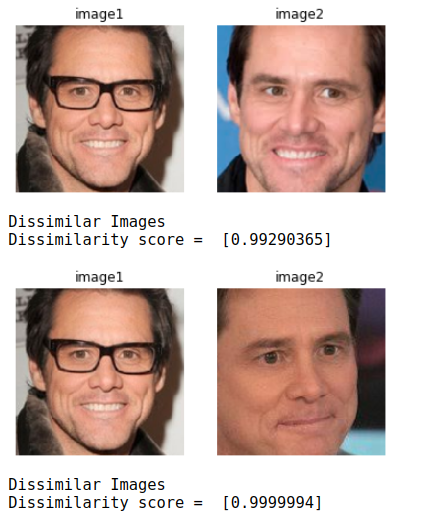 </td>
</tr></table>

Shown below are few results from our model-2 using FaceNet. Model-2 gave us an accuracy of 95.4% on the Faces1999 test set, compared to the 63.7% on model-1.


<table><tr>
<td> 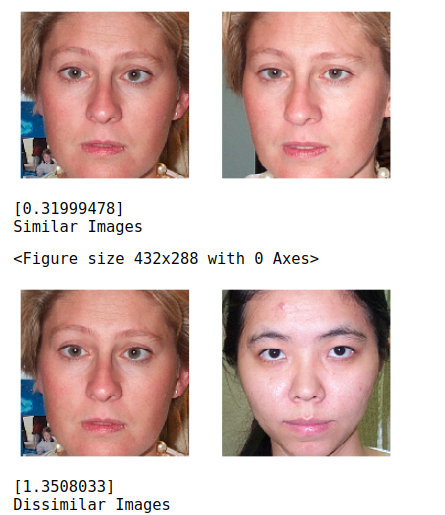 </td>
<td> 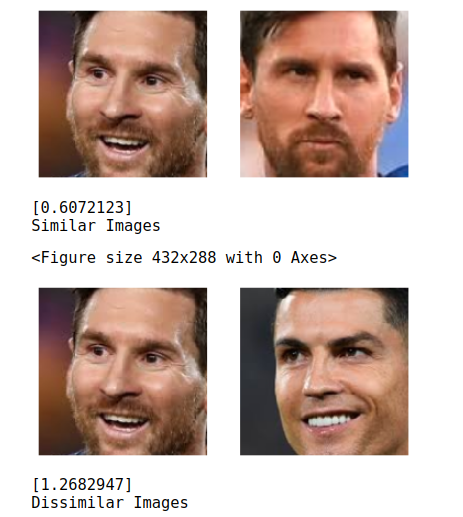 </td>
<td> 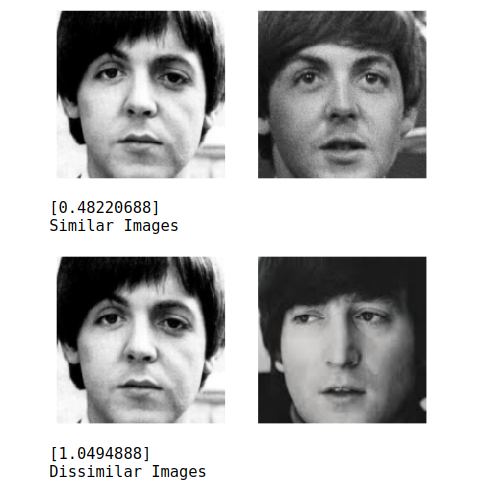 </td>
</tr></table>

<table><tr>
<td> 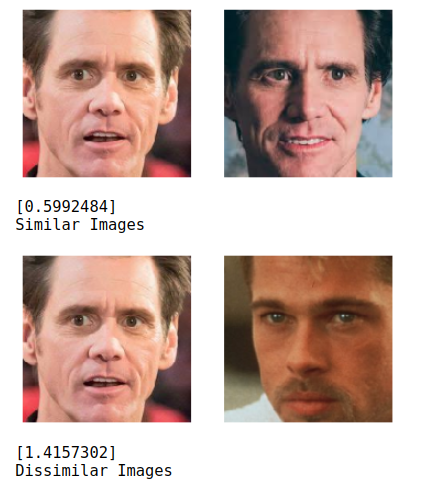 </td>
</tr></table>

Shown below is the result of real time implementation of model-1 (custom model).
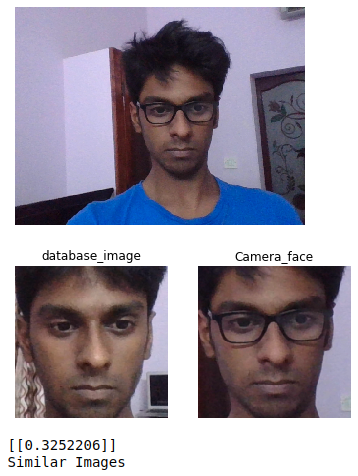

Shown below is the result of real time implementation of model-2 (FaceNet model)
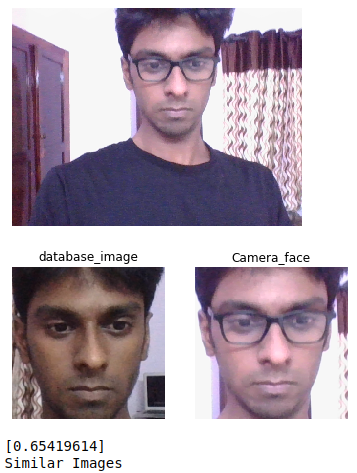

Both models were tested in real-time but model-2 was much more stable towards changes in brightness and background, which is expected because it is such a deeply trained network.

## External Packages Used

[1] Keras<br>
[2] TensorFlow<br>
[3] OpenCV<br>
[4] numpy<br>
[5] matplotlib<br>

As a runtime environment Google CoLab proved invaluable.

# Conclusions

This project helped us in understanding the basic working of the face recognition systems. So it wouldn't be a surprise for us anymore when we come across a face recognition/verification system. Also the project helped us in understanding how to use pretrained models, implementing a model in keras, importance of loss functions, how a really deep network affects the accuracy, how the number of training samples affects the accuracy, how background and lightning conditions affect the model. Also we learned how to detect faces within an image and extract features from it using OpenCV's cascade classifier.

As part of future works, we could look into detecting multiple faces in a single image and give a degree of similarity. If not for any immediate practical use, I believe there could be a use-case where detecting multiple faces within an image and then comparing could be very useful.

# References

[1] Siamese Neural Networks for One-shot Image Recognition by Gregory Koch, Richard Zemel, Ruslan Salakhutdinov<br><br>
[2] FaceNet: A Unified Embedding for Face Recognition and Clustering by Florian Schroff, Dmitry Kalenichenko, James Philbin<br><br>
[3] Bromley, Jane, et al. “Signature verification using a” siamese” time delay neural network.” Advances in neural information processing systems. 1994<br><br>
[4] https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html - Last used December 9th 2019<br><br>
[5] http://llcao.net/cu-deeplearning17/pp/class10_FaceNet.pdf - Last used December 9th 2019<br><br>
[6] https://cswww.essex.ac.uk/mv/allfaces/faces95.html - Last used December 9th 2019<br><br>
[7] http://www.vision.caltech.edu/html-files/archive.html - Last used December 9th 2019<br><br>

# Code and Implementation

In [1]:
import numpy as np
import cv2
import os
import random
np.random.seed(2)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
%pylab inline 
from IPython.display import clear_output
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import tensorflow as tf
import keras
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import optimizers
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras import backend as K
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.initializers import glorot_uniform
from keras.engine.topology import Layer
from keras.regularizers import l2

from support_functions import *

Populating the interactive namespace from numpy and matplotlib


/home/sonu/anaconda3/envs/python35/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
Using TensorFlow backend.


In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [3]:
path1='/home/sonu/Documents/Face_Ver_project/faces95/train' #Path containing train set
path2='/home/sonu/Documents/Face_Ver_project/faces95/val' #Path containing validation set
data1,data2,y=read_image(path1,48,3000)    # Load train_set images                                        
data3,data4,y_val=read_image(path2,24,500)  # Load validate_set images                                         

In [4]:
def init_weights(shape, dtype=None): # Function to initialize weights in network
    return K.random_normal(shape=shape,mean=0.0,stddev=0.01, dtype=dtype)

def init_bias(shape, dtype=None):  # Function to initialize bias in network
    return K.random_normal(shape=shape,mean=0.5,stddev=0.01, dtype=dtype)

def difference(outputs):  # Function to find the difference between encodings of images
    x, y = outputs
    return K.abs(x-y)

def output_shape(shapes): # Function to find the shape of encoded images.
    shape1, shape2 = shapes
    return shape1

In [5]:
def model_func(input_shape): # Function to define our siamese model.Returns our model


    image_1 = Input(input_shape)
    image_2 = Input(input_shape)

    model = Sequential()
    model.add(Conv2D(64, (10,10), activation='relu',kernel_initializer=init_weights,input_shape=input_shape,kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (7,7), activation='relu',kernel_initializer=init_weights,bias_initializer=init_bias, input_shape=input_shape,kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (5,5), activation='relu',kernel_initializer=init_weights,bias_initializer=init_bias, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(256, (5,5), activation='relu',kernel_initializer=init_weights,bias_initializer=init_bias, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(256, (3,3), activation='relu',kernel_initializer=init_weights,bias_initializer=init_bias, kernel_regularizer=l2(2e-4)))
    model.add(Flatten())
    model.add(Dense(4096, activation='sigmoid',kernel_initializer=init_weights,bias_initializer=init_bias,
                   kernel_regularizer=l2(1e-3)))
    

    out1 = model(image_1)
    out2 = model(image_2)

    difference_1 = Lambda(difference, output_shape = output_shape)([out1, out2])
    final_out = Dense(1,activation='sigmoid')(difference_1)
    siamese_net = Model(inputs=[image_1,image_2],outputs=final_out)
    
    return siamese_net

In [6]:
model = model_func((160, 160, 3))
model.summary()






__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 160, 3)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 160, 160, 3)  0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 4096)         11681344    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 4096)         0           sequential_1[1][0]               
     

In [5]:
# from keras.utils import plot_model 
# plot_model(model, to_file='model.png')

In [6]:
opt = RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.0) # different optimizer functions
#opt = keras.optimizers.Adam(lr= 6e-5)
#opt = SGD(lr=1e-4, decay=1e-6, momentum=0.9, nesterov=True)

def acc(y_true, y_pred): # defined accuracy function for the siamese model.
    ones = K.ones_like(y_pred)
    return K.mean(K.equal(y_true, ones - K.clip(K.round(y_pred), 0, 1)), axis=-1)

def contrastive_loss(y_true,y_pred): # function to implement contrastive loss function
    margin = 1
    return K.mean(y_true * K.square(y_pred) + (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))

model.compile(loss=contrastive_loss,optimizer=opt,metrics=[acc]) # compile the model with defined loss function,
                                                                 # optimizer and accuracy function.

In [8]:
# train model and save the weights which gives best result on validation dataset
checkpointer = ModelCheckpoint('weights.h5',monitor='val_acc', verbose=1, save_best_only=True)
trained_model = model.fit([data1,data2],y, epochs = 30,batch_size = 25,validation_data = ([data3,data4], y_val)
                           ,shuffle = False,callbacks=[checkpointer],verbose = 1)    

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 2941 samples, validate on 497 samples
Epoch 1/30
2941/2941 [==============================] - 26s 9ms/step - loss: 0.6722 - acc: 0.7028 - val_loss: 0.4753 - val_acc: 0.7002

Epoch 00001: val_acc improved from -inf to 0.70020, saving model to weights.h5
Epoch 2/30
2941/2941 [==============================] - 23s 8ms/step - loss: 0.3369 - acc: 0.8545 - val_loss: 0.3280 - val_acc: 0.7847

Epoch 00002: val_acc improved from 0.70020 to 0.78471, saving model to weights.h5
Epoch 3/30
2941/2941 [==============================] - 22s 7ms/step - loss: 0.2385 - acc: 0.9038 - val_loss: 0.2832 - val_acc: 0.7907

Epoch 00003: val_acc improved from 0.78471 to 0.79074, saving model to weights.h5
Epoch 4/30
2941/2941 [==============================] - 22s 7ms/step - loss: 0.1896 - acc: 0.9255 - val_loss: 0.2567 - val_acc: 0.7968

Epoch 00004: val_acc improved from 0.79074 to 0.79678, saving model to 

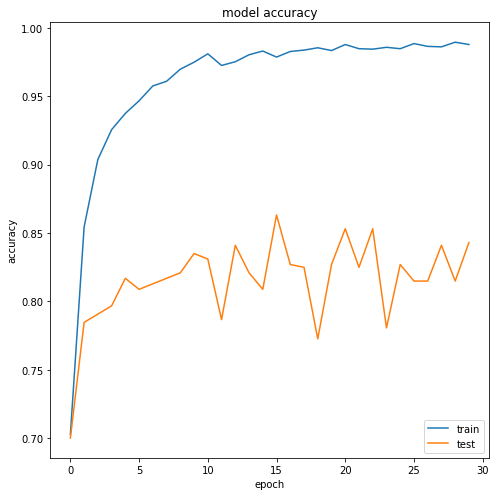

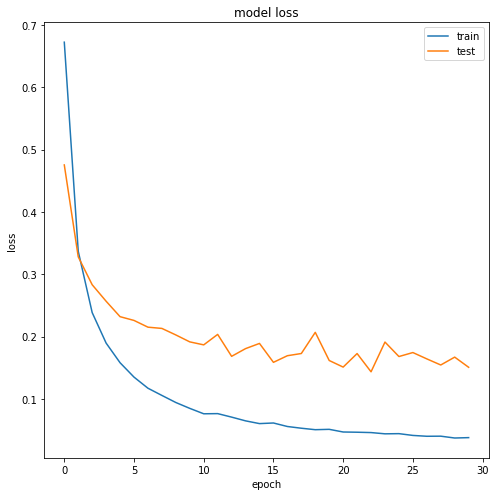

In [9]:
#plot the model accuracy and model loss

import os
plt.figure(figsize=(7,7))
plt.plot(trained_model.history['acc'])
plt.plot(trained_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.tight_layout()
plt.show()
plt.figure(figsize=(7,7))
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [10]:
path = "/home/sonu/Documents/Face_Ver_project/weights.h5" 
model.save_weights(path) # save weights after training

In [7]:
path = "/home/sonu/Documents/Face_Ver_project/weights.h5" 
model.load_weights(path) # load weights to the model

##### Testing the accuracy of model on different images

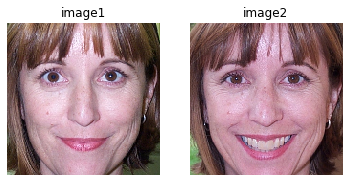

Similar Images
Dissimilarity score =  [0.2664638]


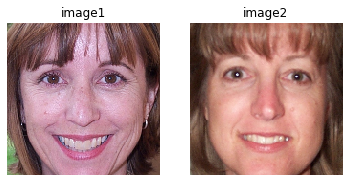

Dissimilar Images
Dissimilarity score =  [0.99960595]


In [8]:
img1_path='/home/sonu/Documents/Face_Ver_project/4.jpg'
img2_path='/home/sonu/Documents/Face_Ver_project/3.jpg'
img3_path='/home/sonu/Documents/Face_Ver_project/image_0188.jpg'
c=output_model_1(model,img1_path,img2_path)
c=output_model_1(model,img2_path,img3_path)

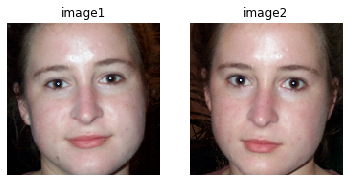

Similar Images
Dissimilarity score =  [0.22901435]


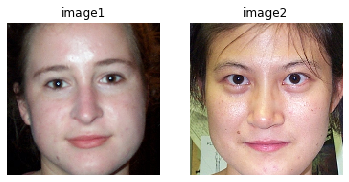

Dissimilar Images
Dissimilarity score =  [1.]


In [9]:
img1_path='/home/sonu/Documents/Face_Ver_project/image_0125.jpg'
img2_path='/home/sonu/Documents/Face_Ver_project/image_0126.jpg'
img3_path='/home/sonu/Documents/Face_Ver_project/image_0442.jpg'
c=output_model_1(model,img1_path,img2_path)
c=output_model_1(model,img1_path,img3_path)

# Failure Cases
###### Our model failed to predict on these examples

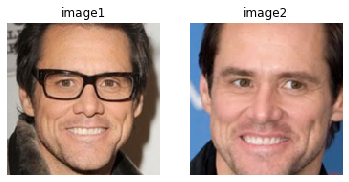

Dissimilar Images
Dissimilarity score =  [0.99290365]


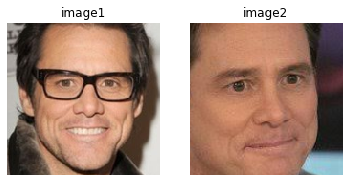

Dissimilar Images
Dissimilarity score =  [0.9999994]


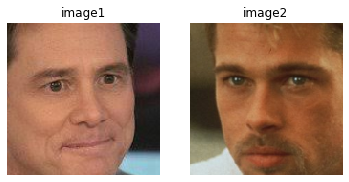

Dissimilar Images
Dissimilarity score =  [0.99748623]


In [48]:
img1_path='/home/sonu/Documents/Face_Ver_project/jim_carrey/jc3.jpg'
img2_path='/home/sonu/Documents/Face_Ver_project/jim_carrey/jc4.jpeg'
img3_path='/home/sonu/Documents/Face_Ver_project/jim_carrey/jc1.jpeg'
img4_path='/home/sonu/Documents/Face_Ver_project/jim_carrey/brad_pitt.jpg'
c=output_model_1(model,img1_path,img2_path)
c=output_model_1(model,img1_path,img3_path)
c=output_model_1(model,img3_path,img4_path)

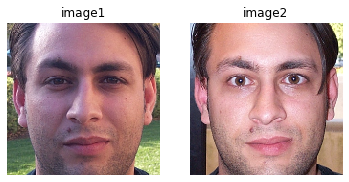

Dissimilar Images
Dissimilarity score =  [0.9896031]


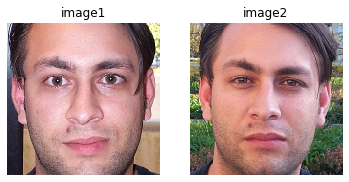

Dissimilar Images
Dissimilarity score =  [0.81914663]


In [11]:
img1_path='/home/sonu/Documents/Face_Ver_project/image_0302.jpg'
img2_path='/home/sonu/Documents/Face_Ver_project/image_0306.jpg'
img3_path='/home/sonu/Documents/Face_Ver_project/image_0307.jpg'
c=output_model_1(model,img1_path,img2_path)
c=output_model_1(model,img2_path,img3_path)

#### Used faces1999 dataset to test the model.

In [23]:
path3='/home/sonu/Documents/Face_Ver_project/faces12'
data5,data6,y_test=read_image2(path3,18,200) # Load faces12 dataset

In [55]:
temp=model.predict([data5,data6])
count=0
for i in range(len(y_test)):
    if temp[i]<0.6:
        g='1'
    else:
        g='0'
    if g==y_test[i][0]:
        count=count+1
print("Accuracy Percentage:-",count*(100/len(y_test)))

Accuracy Percentage:- 63.79310344827586


The precentage accuracy on test dataset is only 63.79%.This is due to the fact that the images in faces1999 dataset vary by image brightness, background, shading etc.Next, rather than testing on images from internet we decided to test the network using our images.We were getting pretty good results.

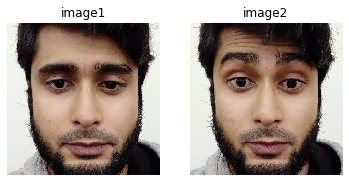

Similar Images
Dissimilarity score =  [0.00045683]


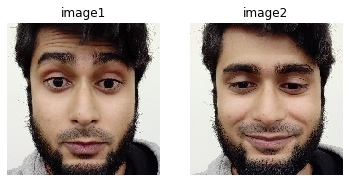

Similar Images
Dissimilarity score =  [0.01922858]


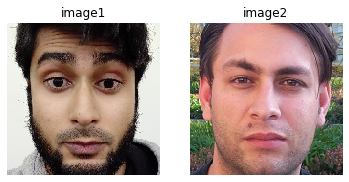

Dissimilar Images
Dissimilarity score =  [0.9999995]


In [25]:
img1_path='/home/sonu/Downloads/IMG_20191209_231328.jpg'
img2_path='/home/sonu/Downloads/IMG_20191209_231335.jpg'
img3_path='/home/sonu/Downloads/IMG_20191209_231406.jpg'
img4_path='/home/sonu/Documents/Face_Ver_project/image_0307.jpg'
c=output_model_1(model,img1_path,img2_path)
c=output_model_1(model,img2_path,img3_path)
c=output_model_1(model,img2_path,img4_path)

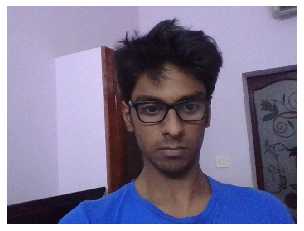

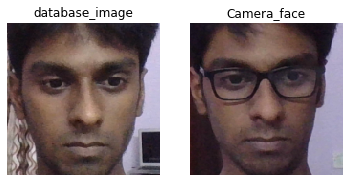

[[0.3252206]]
Similar Images


array([[0.3252206]], dtype=float32)

In [26]:
img1_path="/home/sonu/Documents/Face_Ver_project/sonu.png"
from_camera(model,img1_path,cascade_path,True)

# **USING FACENET**

So next we decided to implement a siamese model using the pretrained facenet Network.

In [26]:
size=160
model_path = '/home/sonu/Documents/Face_Ver_project/facenet_keras.h5' # path to the pretrained model
model_weight_path = '/home/sonu/Documents/Face_Ver_project/facenet_keras_weights.h5' # path to the weights

In [12]:
def distance_facenet(outputs): # Calculate the difference between the encodings of 2 images.
    out1,out2=outputs
    out1=out1/(tf.linalg.norm(out1))
    out2=out2/(tf.linalg.norm(out2))
    distance=tf.linalg.norm(out1-out2)
    return distance

def output_shape(shapes):
    shape1, shape2 = shapes
    return shape1  

def siamese_facenet1(facenet_model_path): # creates a siamese model of facenet
    input_shape=(160,160,3)
    image_1 = Input(input_shape)
    image_2 = Input(input_shape)
    
    facenet_model = load_model(model_path)
    model=facenet_model
    
    out1 = model(image_1)
    out2 = model(image_2)
   
    distance = Lambda(distance_facenet,output_shape=output_shape)([out1, out2])
    facenet_siamese = Model(inputs=[image_1,image_2],outputs=distance)
    
    return facenet_siamese   

In [13]:
siamese_facenet=siamese_facenet1(model_path)
siamese_facenet.summary()








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 160, 3)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 160, 160, 3)  0                                            
__________________________________________________________________________________________________
inception_resnet_v1 (Model)     (None, 128)          22808144    input_1[0][0]                    
                                                                 input_2[0][0]                    
______________________________________________________________________________________

In [10]:
# from keras.utils import plot_model
# plot_model(siamese_facenet, to_file='model1.png')

# Functions to test the working of facenet model

In [9]:
def standardize_image(img): # Function to standardize the input images
  img=img/255.0 
  mean=np.mean(img,keepdims=True)
  std=np.std(img,keepdims=True)
  return (img-mean)/std

# Function "preprocess_image" crops out faces from the images and also reshape images for our model.

def preprocess_image(img1_path,img2_path,cascade_path,display_image=False):  
  size=160
  face_cascade = cv2.CascadeClassifier(cascade_path) # opencv function to crop out face from an image
  img1 = cv2.imread(img1_path)
  if len(img1)==0:
    print("No image found in Path 1,Please check the filename")
    return 

  img2 = cv2.imread(img2_path)
  if len(img2)==0:
    print("No image found in Path 2,Please check the filename")
    return 

  faces1 = face_cascade.detectMultiScale(img1, 1.05, 15)
  faces2 = face_cascade.detectMultiScale(img2, 1.05, 15)
  i=0

  if len(faces2)==0:
    print("Could not find face in second image,Please try another image")
    return
  if len(faces1)==0:
    print("Could not find face in first image,Please try another image")
    return
  for (x, y, w, h) in faces1:
    if i==0:
      img=img1[y:y+h,x:x+w]
      img1=cv2.resize(img,(size,size))
      i=i+1
  test1 =img1.reshape(1,size,size,3)
  test1=standardize_image(test1)
  
  i=0
  for (x, y, w, h) in faces2:
    if i==0:
      img=img2[y:y+h,x:x+w]
      img2=cv2.resize(img,(size,size))
      if display_image: # to output both images
        p = plt.figure()
        p.add_subplot(1,2, 1)
        plt.axis("off")
        plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
        p.add_subplot(1,2, 2)
        plt.axis("off")
        plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
        plt.show(block=True)      
      i=i+1
  test2 =img2.reshape(1,size,size,3)
  test2=standardize_image(test2)
  return test1,test2

# function to test whether two images are similar or not.
def check_similarity(model,img1_path,img2_path,cascade_path): 
  test1,test2=preprocess_image(img1_path,img2_path,cascade_path,True)
  distance = model.predict([test1,test2])
  print(distance)
  if distance<1.1:
    print("Similar Images")
  if distance>1.1:
    print("Dissimilar Images")
  return distance

In [10]:
# path to the cascade classifier for face detection using opencv.
cascade_path = '/home/sonu/Documents/Face_Ver_project/haarcascade_frontalface_default.xml' 

##### Testing the accuracy of model on different images

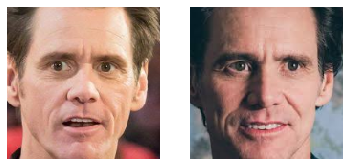

[0.5992484]
Similar Images


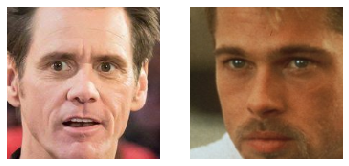

[1.4157302]
Dissimilar Images


In [28]:
img1_path = '/home/sonu/Documents/Face_Ver_project/jim_carrey/jc5.jpeg'
img2_path = '/home/sonu/Documents/Face_Ver_project/jim_carrey/jc2.jpeg'
img3_path = '/home/sonu/Documents/Face_Ver_project/jim_carrey/brad_pitt.jpg'
h=check_similarity(siamese_facenet,img1_path,img2_path,cascade_path)
h=check_similarity(siamese_facenet,img1_path,img3_path,cascade_path)

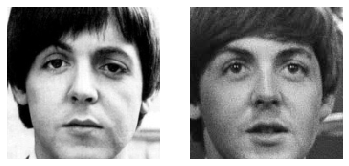

[0.48220688]
Similar Images


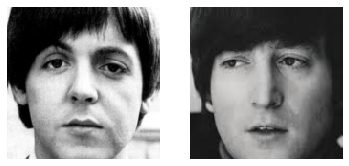

[1.0494888]
Dissimilar Images


In [340]:
img1_path = '/home/sonu/Documents/Face_Ver_project/paul/5.jpg'
img2_path = '/home/sonu/Documents/Face_Ver_project/paul/7.jpeg'
img3_path = '/home/sonu/Documents/Face_Ver_project/paul/8.jpeg'
h=check_similarity(siamese_facenet,img1_path,img2_path,cascade_path)
h=check_similarity(siamese_facenet,img1_path,img3_path,cascade_path)

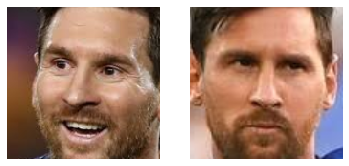

[0.6072123]
Similar Images


<Figure size 432x288 with 0 Axes>

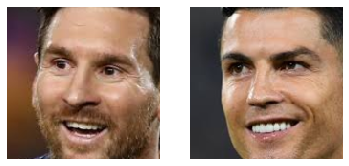

[1.2682947]
Dissimilar Images


<Figure size 432x288 with 0 Axes>

In [328]:
img1_path = '/home/sonu/Documents/Face_Ver_project/messi/messi1.jpeg'
img2_path = '/home/sonu/Documents/Face_Ver_project/messi/messi3.jpeg'
img3_path = '/home/sonu/Documents/Face_Ver_project/messi/ronaldo1.jpeg'
h=check_similarity(siamese_facenet,img1_path,img2_path,cascade_path)
h=check_similarity(siamese_facenet,img1_path,img3_path,cascade_path)

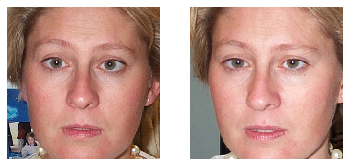

[0.3199949]
Similar Images


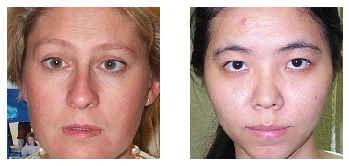

[1.3508034]
Dissimilar Images


In [16]:
img1_path = '/home/sonu/Documents/Face_Ver_project/girl/1.jpg'
img2_path = '/home/sonu/Documents/Face_Ver_project/girl/2.jpg'
img3_path = '/home/sonu/Documents/Face_Ver_project/girl/6.jpg'
h=check_similarity(siamese_facenet,img1_path,img2_path,cascade_path)
h=check_similarity(siamese_facenet,img1_path,img3_path,cascade_path)

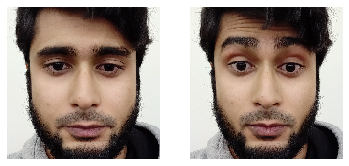

[0.5009943]
Similar Images


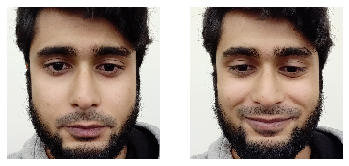

[0.47096154]
Similar Images


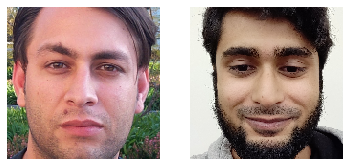

[1.2291422]
Dissimilar Images


In [27]:
img1_path='/home/sonu/Downloads/IMG_20191209_231328.jpg'
img2_path='/home/sonu/Downloads/IMG_20191209_231335.jpg'
img3_path='/home/sonu/Downloads/IMG_20191209_231406.jpg'
img4_path='/home/sonu/Documents/Face_Ver_project/image_0307.jpg'
h=check_similarity(siamese_facenet,img1_path,img2_path,cascade_path)
h=check_similarity(siamese_facenet,img1_path,img3_path,cascade_path)
h=check_similarity(siamese_facenet,img4_path,img3_path,cascade_path)

### Functions to find the accuracy of facenet on face1999 dataset

In [8]:
def facenet_ver_compare(model,img1,img2,display_image=False): 
    
  cascade_path = '/home/sonu/Documents/Face_Ver_project/haarcascade_frontalface_default.xml'
  size=160
  face_cascade = cv2.CascadeClassifier(cascade_path) # opencv function to crop out face from an image
  if len(img1)==0:
    print("No image found in Path 1,Please check the filename")
    return 
  if len(img2)==0:
    print("No image found in Path 2,Please check the filename")
    return 

  test1 =img1.reshape(1,size,size,3)
  test2 =img2.reshape(1,size,size,3)
  distance = siamese_facenet.predict([test1,test2])
  return distance

def siamese_facenet_accuracy(facenet_model,data3,data4,y_val):
    t=0
    count=0
    a=[]

    for i in range(len(y_val)):
          distance=facenet_ver_compare(facenet_model,data3[i],data4[i])
          if distance<1.1:
                t='1'
          if distance>=1.1:
                t='0'
          if t==y_val[i][0]:
                count=count+1 
          else:
            a.append(i)
    return count*(100/len(y_val)),a   

##### Display few images which are incorrectly classified by facenet siamese model.Since the images are in standardized form they are not visually appealing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


percentage accuracy on test_dataset =  95.4%
[2, 39, 50, 68, 94, 95, 126, 163]


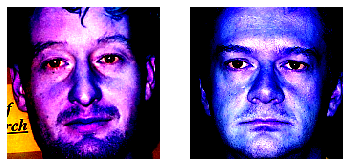

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


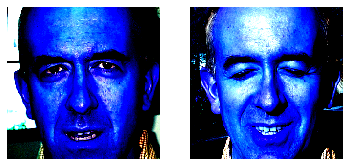

In [58]:
g,a=siamese_facenet_accuracy(siamese_facenet,data5,data6,y_test)
print("percentage accuracy on test_dataset = ",round(g,2),end="")
print("%")
print(a)

p = plt.figure()
p.add_subplot(1,2, 1)
plt.axis("off")
plt.imshow(data5[a[0]])
g=g+1
p.add_subplot(1,2, 2)
plt.axis("off")
plt.imshow(data6[a[0]])  
plt.show(block=True) 

p = plt.figure()
p.add_subplot(1,2, 1)
plt.axis("off")
plt.imshow(data5[a[5]])
g=g+1
p.add_subplot(1,2, 2)
plt.axis("off")
plt.imshow(data6[a[5]])  
plt.show(block=True) 


#### The function "from_camera" can be used to verify the model realtime using a camera.It compares the face in the frame of camera to the images stored in our database.

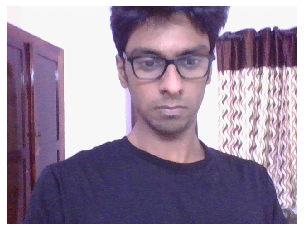

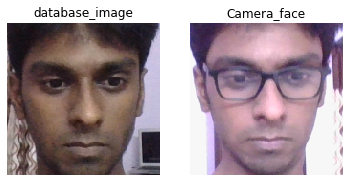

[0.65419614]
Similar Images


array([0.65419614], dtype=float32)

In [69]:
img1_path="/home/sonu/Documents/Face_Ver_project/sonu.png"
from_camera(siamese_facenet,img1_path,cascade_path,True)

In [1]:
import io
from nbformat import current
import glob
nbfile = glob.glob('Face_Verify.ipynb')
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')
word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)

/home/sapchat/anaconda3/lib/python3.6/site-packages/nbformat/current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


Word count for file Face_Verify.ipynb is 4275
